In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import random
import hypernetx as hnx
import os

source_path = os.path.abspath("../source/")
sys.path.append(source_path)
import centrality as central
import plotting as plt2

In [2]:
# Set the seed value
random.seed(1729)  # You can use any integer as your seed

# Generate random numbers
print(random.random()) # 0.9963723767827669

0.9963723767827669


In [3]:
np.random.seed(1729)

print(np.random.random()) # 0.2121

0.21215859519373315


In [4]:
def build_centralized_graph(n, p):
    """
    Builds a connected graph with n nodes where p nodes have high eigenvector centrality.

    Args:
      n: The total number of nodes in the graph.
      p: The number of nodes with high eigenvector centrality.

    Returns:
      A NetworkX graph object.
    """

    # Create a graph with n nodes, labeled as 'A', 'B', 'C',...
    nodes = [chr(ord('A') + i) for i in range(n)]
    graph = nx.Graph()
    graph.add_nodes_from(nodes)

    # Create a central cluster
    for i in range(p):
        for j in range(i + 1, p):
            graph.add_edge(nodes[i], nodes[j])

    # Connect remaining nodes to the central cluster
    for i in range(p, n):
        # Connect to a random node in the central cluster
        central_node = random.choice(nodes[:p])
        graph.add_edge(nodes[i], central_node)

    # Add some random connections for increased connectivity (optional)
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < 0.1:  # Adjust probability as needed
                graph.add_edge(nodes[i], nodes[j])

    return graph


nodes = 10
central_nodes = 2
G = build_centralized_graph(nodes, central_nodes)
print(G)

Graph with 10 nodes and 12 edges


min(centrality_values)=0.16084746820532098
max(centrality_values)=0.5403235699255918


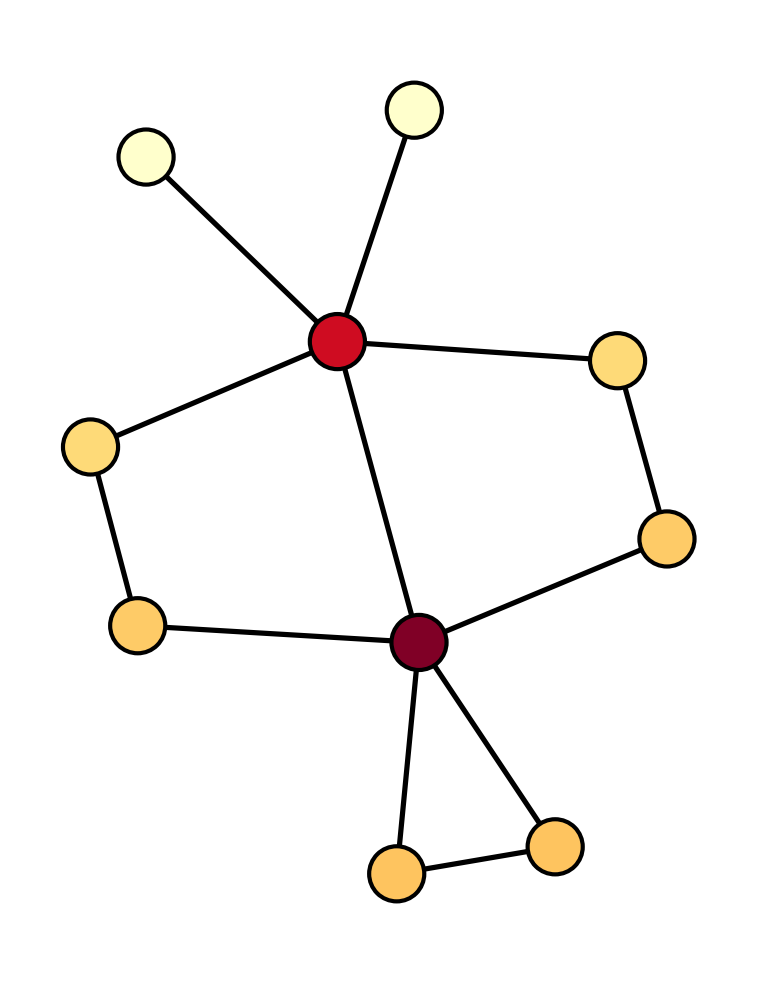

In [30]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 4

# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality(G)
# centrality = nx.degree_centrality(G)

# Get a list of nodes and their corresponding centrality values
nodes = list(G.nodes())
centrality_values = list(centrality.values())
print(f"{min(centrality_values)=}")
print(f"{max(centrality_values)=}")

G.pos = nx.spring_layout(G, seed=32)

nx.draw_networkx_nodes(
    G, 
    G.pos,
    node_size=175,
    node_color=centrality_values,
    # node_color='deepskyblue',
    cmap=plt.cm.YlOrRd,
    # vmin=0.1,
    # vmax=0.75,
    edgecolors='black', 
    linewidths=1.0,      
)

# nx.draw_networkx_labels(
#     G, G.pos, 
#     font_size=6,
#     font_weight='bold',
# )

nx.draw_networkx_edges(
    G, 
    G.pos,
    width=1.25,
    edge_color='k',
)

plt.axis(False)

plt.show()


In [6]:
# break

SyntaxError: 'break' outside loop (668683560.py, line 1)

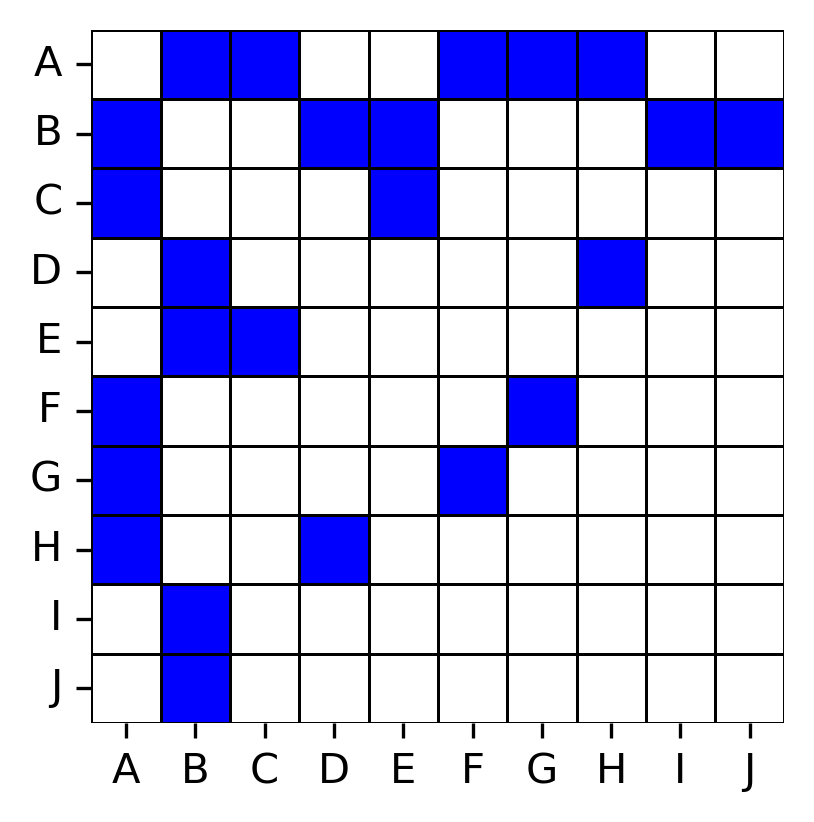

In [23]:
A = nx.to_pandas_adjacency(G).astype(int)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 3

sns.heatmap(
    A, 
    square=True,
    cmap=['w', 'b'],
    cbar=False,
    lw=0.25,
    linecolor='k'
)

plt.gca().tick_params(axis='y', rotation=0)

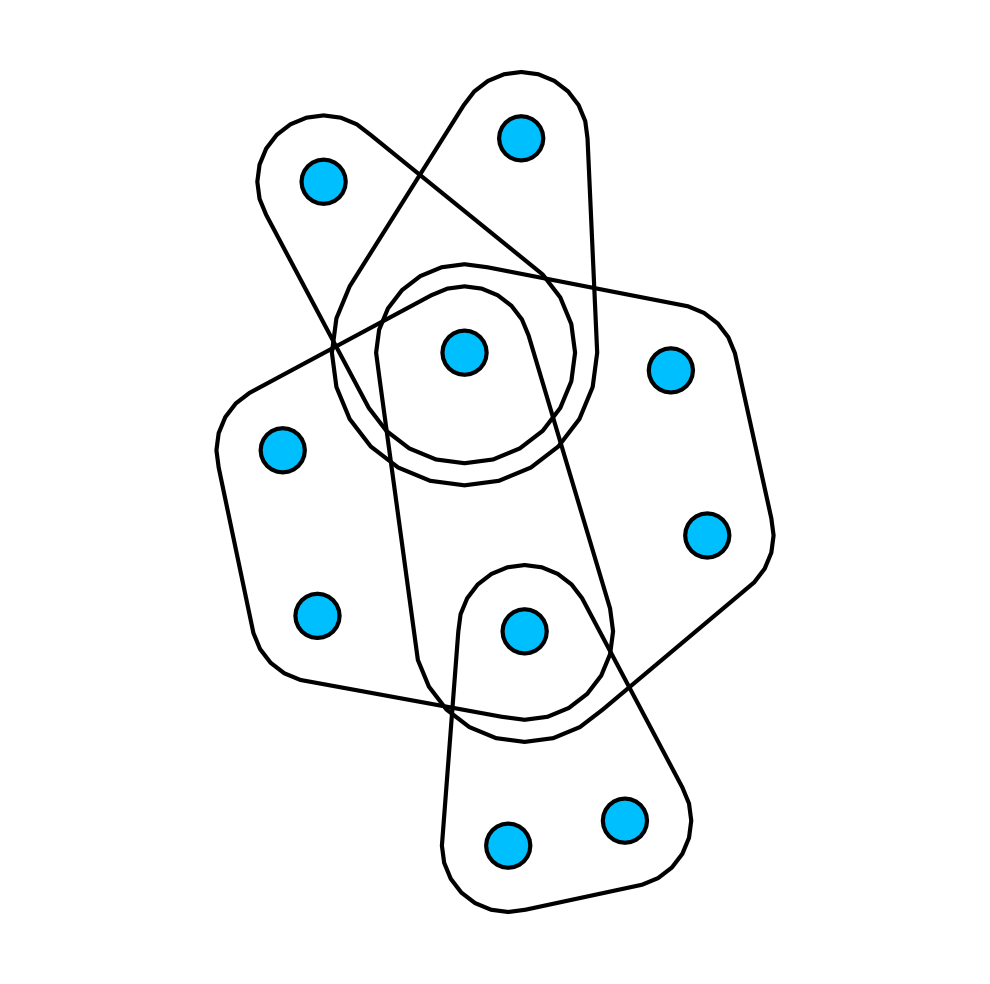

In [28]:
hyperedges = {
    1 : {'A', 'F', 'G'},
    2 : {'A', 'D', 'H', 'B'},
    3 : {'A', 'C', 'E', 'B'},
    4 : {'B', 'I'},
    5 : {'B', 'J'},
}
            
# Create the HyperNetX hypergraph
H = hnx.Hypergraph(hyperedges)



plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 4

hnx.drawing.draw(
    H, 
    pos=G.pos,
    with_node_counts=False, 
    with_edge_counts=False,
    with_edge_labels=False, 
    with_node_labels=False,  # Disable default node labels
    node_radius=2.5,
    nodes_kwargs={'color' : 'deepskyblue', 'edgecolor' : 'k',},
    edges_kwargs={'edgecolors' : 'k', 'linewidth' : 1,},
)

# for node, (x, y) in G.pos.items():
#     plt.text(
#         x, y, 
#         str(node),  
#         fontsize=7, 
#         fontweight='bold',
#         ha='center', va='center',
#  )

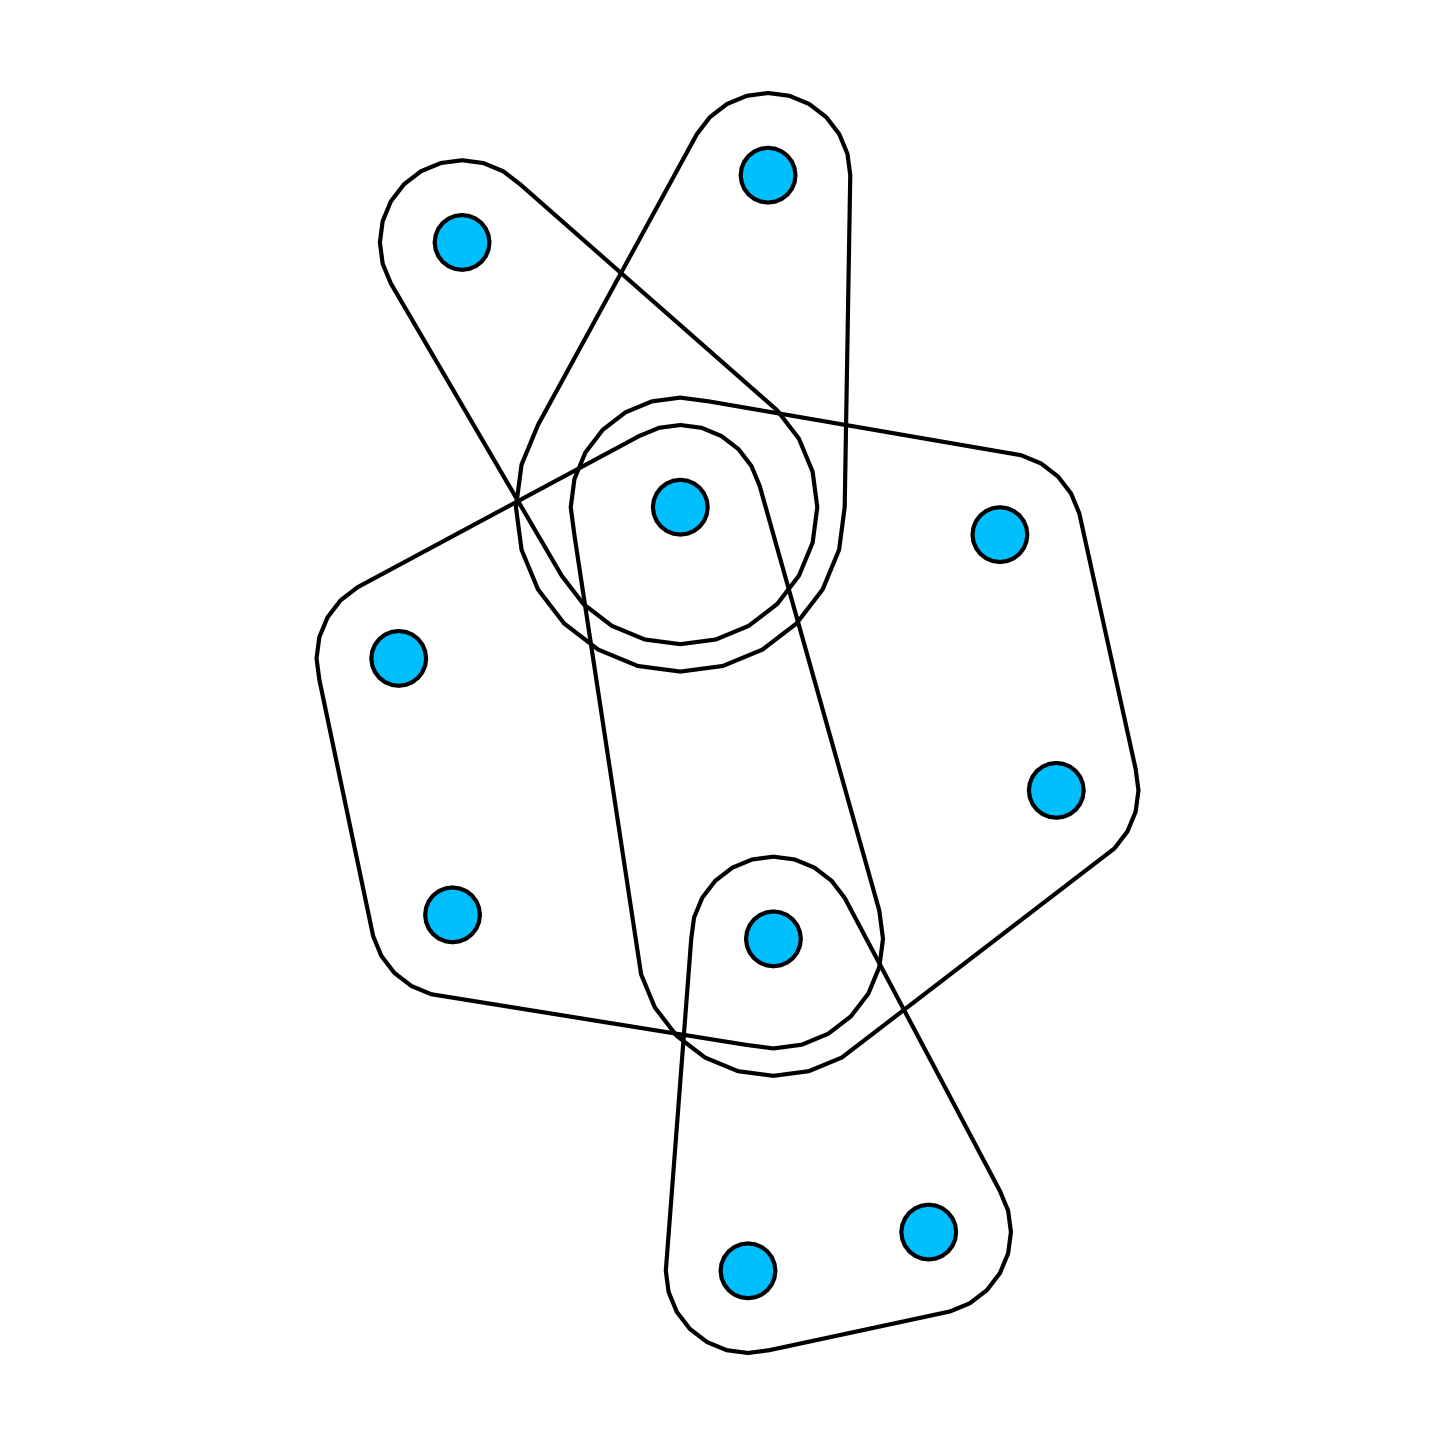

In [32]:
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['figure.figsize'] = 6, 6

# hnx.drawing.draw(
#     H, 
#     pos=G.pos,
#     with_node_counts=False, 
#     with_edge_counts=False,
#     with_edge_labels=False, 
#     with_node_labels=False,  # Disable default node labels
#     node_radius=2,
#     nodes_kwargs={'color' : 'deepskyblue', 'edgecolor' : 'k',},
#     edges_kwargs={'edgecolors' : 'k', 'linewidth' : 1,},
# )

# # for node, (x, y) in G.pos.items():
# #     plt.text(
# #         x, y, 
# #         str(node),  
# #         fontsize=7, 
# #         fontweight='bold',
# #         ha='center', va='center',
# #  )

min(ncent)=0.04083421439761631
max(ncent)=0.26020805366674243


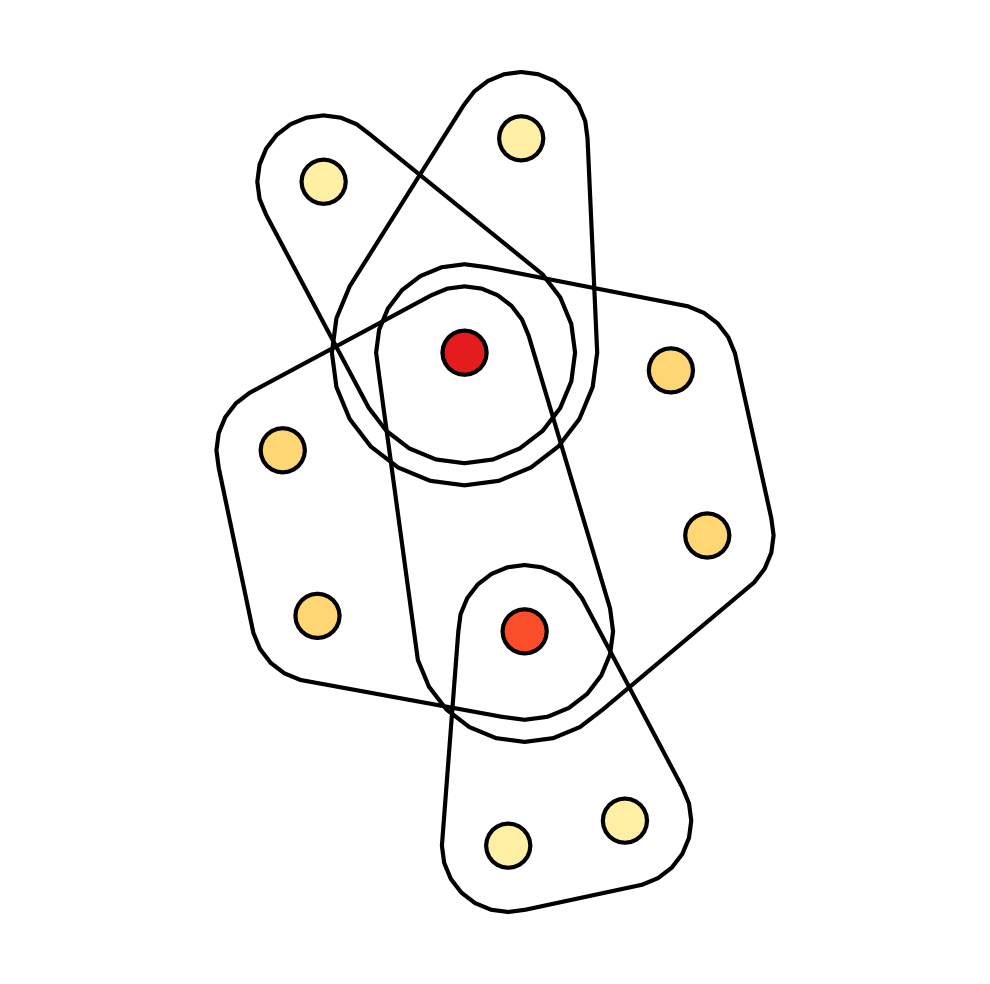

In [33]:
ncent, ecent = central.nonlinear_eigenvector_centrality(
    H.incidence_matrix(), 
    function='linear', 
    maxiter=1000,
)

print(f"{min(ncent)=}")
print(f"{max(ncent)=}")

colormap = plt.cm.YlOrRd
norm = colors.Normalize(vmin=0.0, vmax=0.35,)
scalar_mappable = plt.cm.ScalarMappable(norm=norm, cmap=colormap)
node_colors = scalar_mappable.to_rgba(ncent)

node_colors = dict(zip(H.incidence_dataframe().index, node_colors))

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 4

plt.figure(facecolor='none') 

hnx.drawing.draw(
    H, 
    pos=G.pos,
    with_node_counts=False, 
    with_edge_counts=False,
    with_edge_labels=False, 
    with_node_labels=False,  # Disable default node labels
    node_radius=2.5,
    nodes_kwargs={'color' : node_colors, 'edgecolor' : 'k',},
    edges_kwargs={'edgecolors' : 'k', 'linewidth' : 1,},
)



# for node, (x, y) in G.pos.items():
#     plt.text(
#         x, y, 
#         str(node),  
#         fontsize=7, 
#         fontweight='bold',
#         ha='center', va='center',
#  )

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 4

for idx, nodes in H.incidence_dict.items():
    order = len(nodes)
    plt.scatter(
        [idx] * order,
        sorted(nodes),
        zorder=3,
        s=45,
        c='deepskyblue',
        ec='k',
    )

    plt.plot(
        [idx] * order,
        nodes,
        zorder=0,c='k',
        lw=1.25,
        )

In [ ]:
B = H.incidence_dataframe()
A_clique = B @ B.T

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 3

sns.heatmap(
    A_clique, 
    square=True,
    cmap='Blues',
    cbar=False,
    lw=0.25,
    linecolor='k'
)

plt.gca().tick_params(axis='y', rotation=0)


In [ ]:
break

In [ ]:
break